In [1]:
import pandas as pd

Data Loading and Preprocessing

In [2]:
#Load the dataset using pandas
heart=pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Loads the data from csv file into dataframe and head is used to print some data of dataset

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Handle any missing values appropriately
heart.info()
#There is no null values
#There are no null values to handle missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Convert categorical variables into dummy/indicator variables
heart_disease = pd.get_dummies(heart, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
heart_disease.head()

#dummy variables act as indicators of presence or absence of category of categorical variable

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,False,False,True,False,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,True,False,False,False,False,False,True,False,True,False
3,56,1,120,236,0,178,0,0.8,0,1,True,False,False,True,False,False,True,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,True,False,False,True,False,True,False


Data Analysis

In [7]:
#Calculate the average age of patients with and without heart disease
avg_with = heart[heart['target'] == 1]['age'].mean()
avg_without = heart[heart['target'] == 0]['age'].mean()

print('Average age of patients with heart disease: ',avg_with)
print('Average age of patients without heart disease: ',avg_without)

#mean() is used to find the average of given data

Average age of patients with heart disease:  52.4969696969697
Average age of patients without heart disease:  56.60144927536232


In [8]:
#Determine the distribution of chest pain types among patients
chestpain_dist = heart_disease[['cp_1', 'cp_2', 'cp_3']].sum()
chestpain_dist

cp_1    50
cp_2    87
cp_3    23
dtype: int64

In [9]:
#Find the correlation between thalach (maximum heart rate) and age
correlation = heart_disease['thalach'].corr(heart_disease['age'])
print('Correlation between thalach and age: ',correlation)

#corr() is used to find correlation between variables

Correlation between thalach and age:  -0.39852193812106756


In [10]:
#Analyze the effect of sex on the presence of heart disease
effect_of_sex = heart_disease.groupby('sex')['target'].mean()
print(effect_of_sex)

#groupby seperates identical data to group

sex
0    0.750000
1    0.449275
Name: target, dtype: float64


Data Visualization

In [11]:
import matplotlib.pyplot as plt

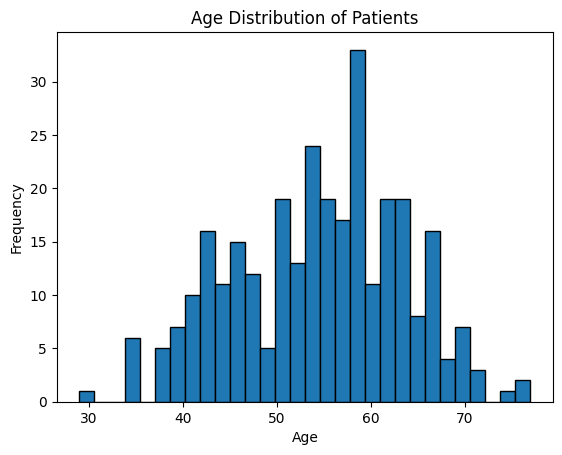

In [12]:
#Plot a histogram of the age distribution of patients
plt.hist(heart_disease['age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#hist is used to plt histogram or to visualize it

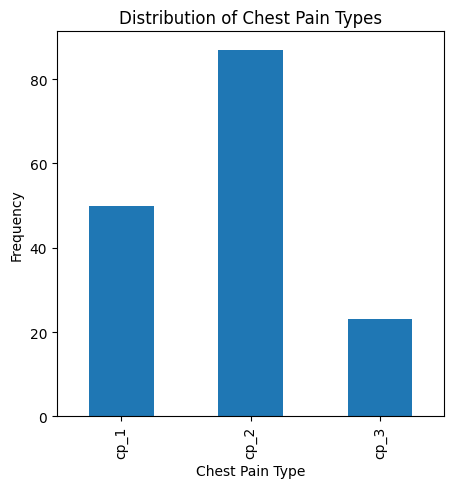

In [13]:
#Create a bar chart showing the distribution of chest pain types among patients
chestpain_dist.plot(kind='bar',figsize=(5,5))
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

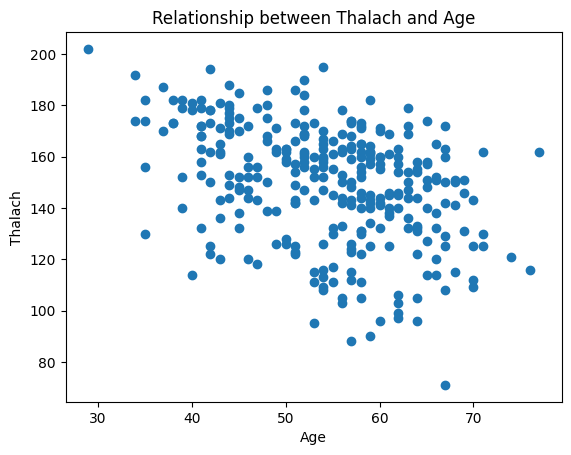

In [14]:
#Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.scatter(heart_disease['age'], heart_disease['thalach'])
plt.title('Relationship between Thalach and Age')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.show()

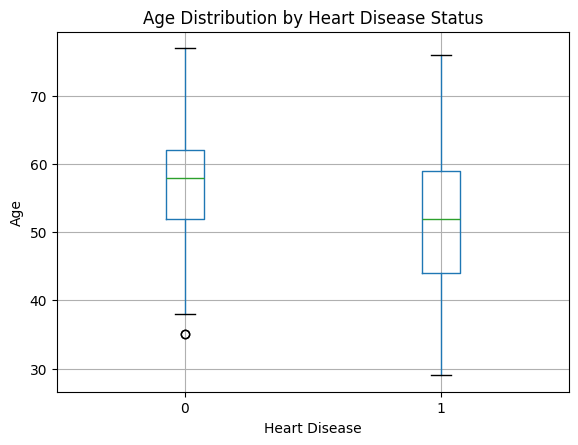

In [15]:
#Create a box plot to compare the age distribution of patients with and without heart disease
heart_disease.boxplot(column='age', by='target')
plt.title('Age Distribution by Heart Disease Status')
plt.suptitle('')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

Advanced Analysis (using numpy)

In [16]:
import numpy as np

In [17]:
#Calculate the correlation matrix for all numerical features in the dataset
correlation_matrix = heart_disease.corr(numeric_only=True)
print(correlation_matrix)

                age       sex  trestbps      chol       fbs   thalach  \
age        1.000000 -0.098447  0.279351  0.213678  0.121308 -0.398522   
sex       -0.098447  1.000000 -0.056769 -0.197912  0.045032 -0.044020   
trestbps   0.279351 -0.056769  1.000000  0.123174  0.177531 -0.046698   
chol       0.213678 -0.197912  0.123174  1.000000  0.013294 -0.009940   
fbs        0.121308  0.045032  0.177531  0.013294  1.000000 -0.008567   
thalach   -0.398522 -0.044020 -0.046698 -0.009940 -0.008567  1.000000   
exang      0.096801  0.141664  0.067616  0.067023  0.025665 -0.378812   
oldpeak    0.210013  0.096093  0.193216  0.053952  0.005747 -0.344187   
ca         0.276326  0.118261  0.101389  0.070511  0.137979 -0.213177   
target    -0.225439 -0.280937 -0.144931 -0.085239 -0.028046  0.421741   
cp_1      -0.147399 -0.041249 -0.081851 -0.012750 -0.060649  0.248317   
cp_2      -0.059432 -0.116588 -0.045107 -0.037918  0.083679  0.165475   
cp_3       0.047516  0.088043  0.151343 -0.050589  

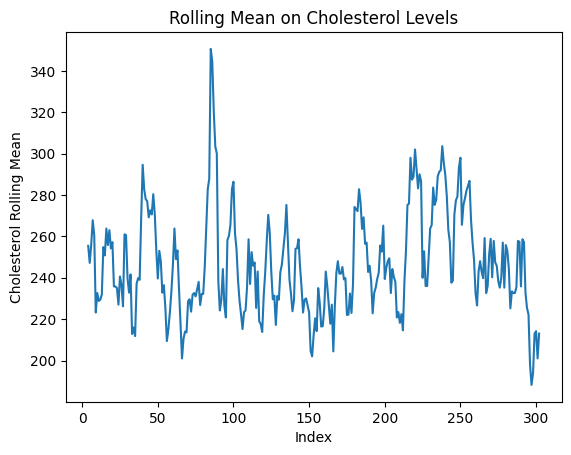

In [18]:
#Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it
heart_disease['chol_rolling_mean'] = heart_disease['chol'].rolling(window=5).mean()
plt.plot(heart_disease['chol_rolling_mean'])
plt.title('Rolling Mean on Cholesterol Levels')
plt.xlabel('Index')
plt.ylabel('Cholesterol Rolling Mean')
plt.show()

#rolling mean is used to analyse data points by creating averages of different selections

In [19]:
# Creating a function that can take a patient’s data as input and return a prediction of whether they have heart disease based on simple thresholding rules
def predict_heart_disease(patient_data):
    # Example rule: If age > 50 and thalach < 150, predict heart disease
    if patient_data['age'] > 50 and patient_data['thalach'] < 150:
        return 1  # Heart disease
    else:
        return 0   #No heart disease
patient = {}
patient['age']=int(input("Enter age:"))
patient['thalach']=int(input("Enter thalach:"))
prediction = predict_heart_disease(patient)
print('Prediction for the patient: ',prediction)

Enter age: 52
Enter thalach: 89


Prediction for the patient:  1


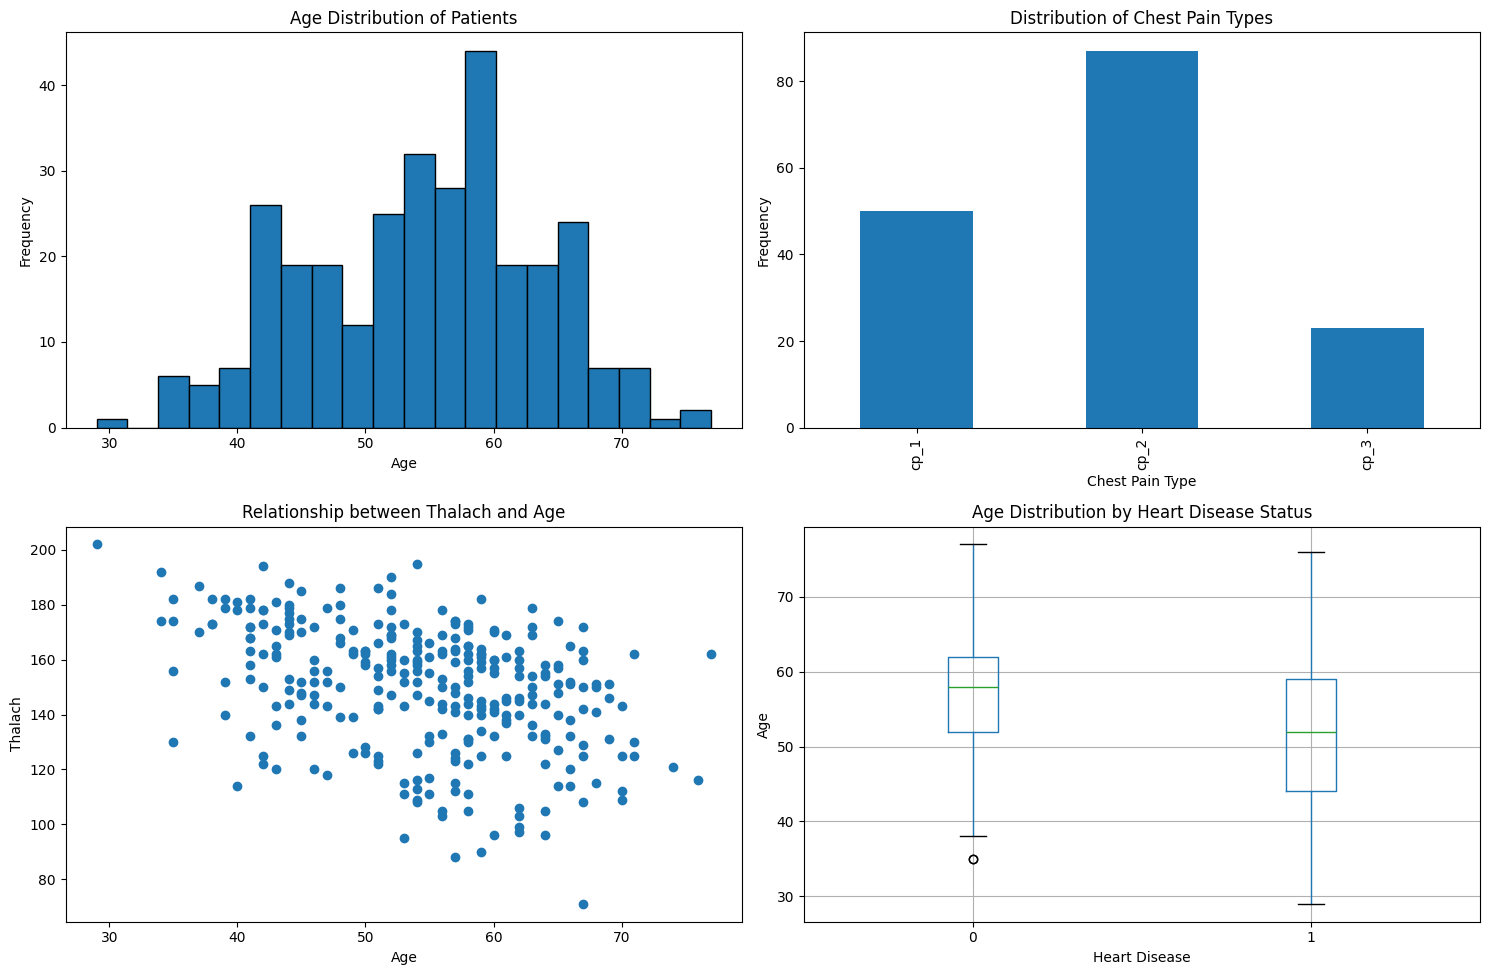

In [20]:
#Use subplots to combine multiple visualizations into one figure for better comparison
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of age distribution
axs[0, 0].hist(heart_disease['age'], bins=20, edgecolor='black')
axs[0, 0].set_title('Age Distribution of Patients')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Bar chart of chest pain distribution
chestpain_dist.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Chest Pain Types')
axs[0, 1].set_xlabel('Chest Pain Type')
axs[0, 1].set_ylabel('Frequency')

# Scatter plot of thalach vs. age
axs[1, 0].scatter(heart_disease['age'], heart_disease['thalach'])
axs[1, 0].set_title('Relationship between Thalach and Age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Thalach')

# Box plot of age distribution by heart disease status
heart_disease.boxplot(column='age', by='target', ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution by Heart Disease Status')
axs[1, 1].set_xlabel('Heart Disease')
axs[1, 1].set_ylabel('Age')
fig.suptitle('')

plt.tight_layout()
plt.show()